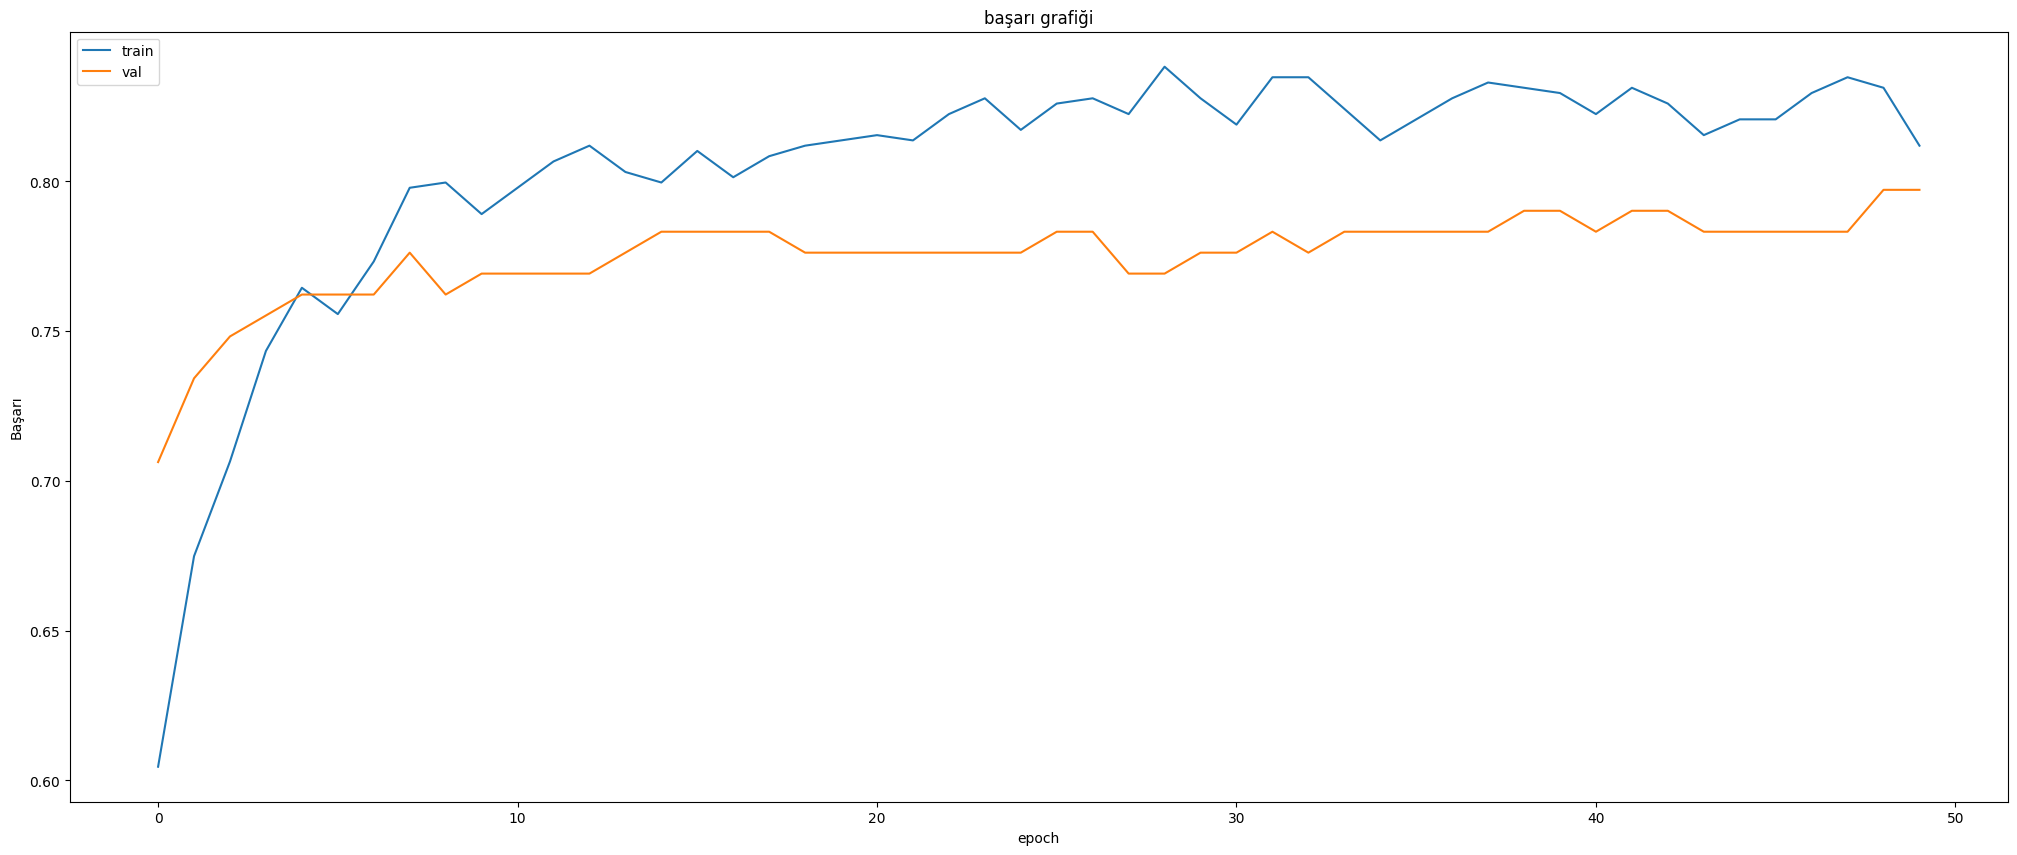

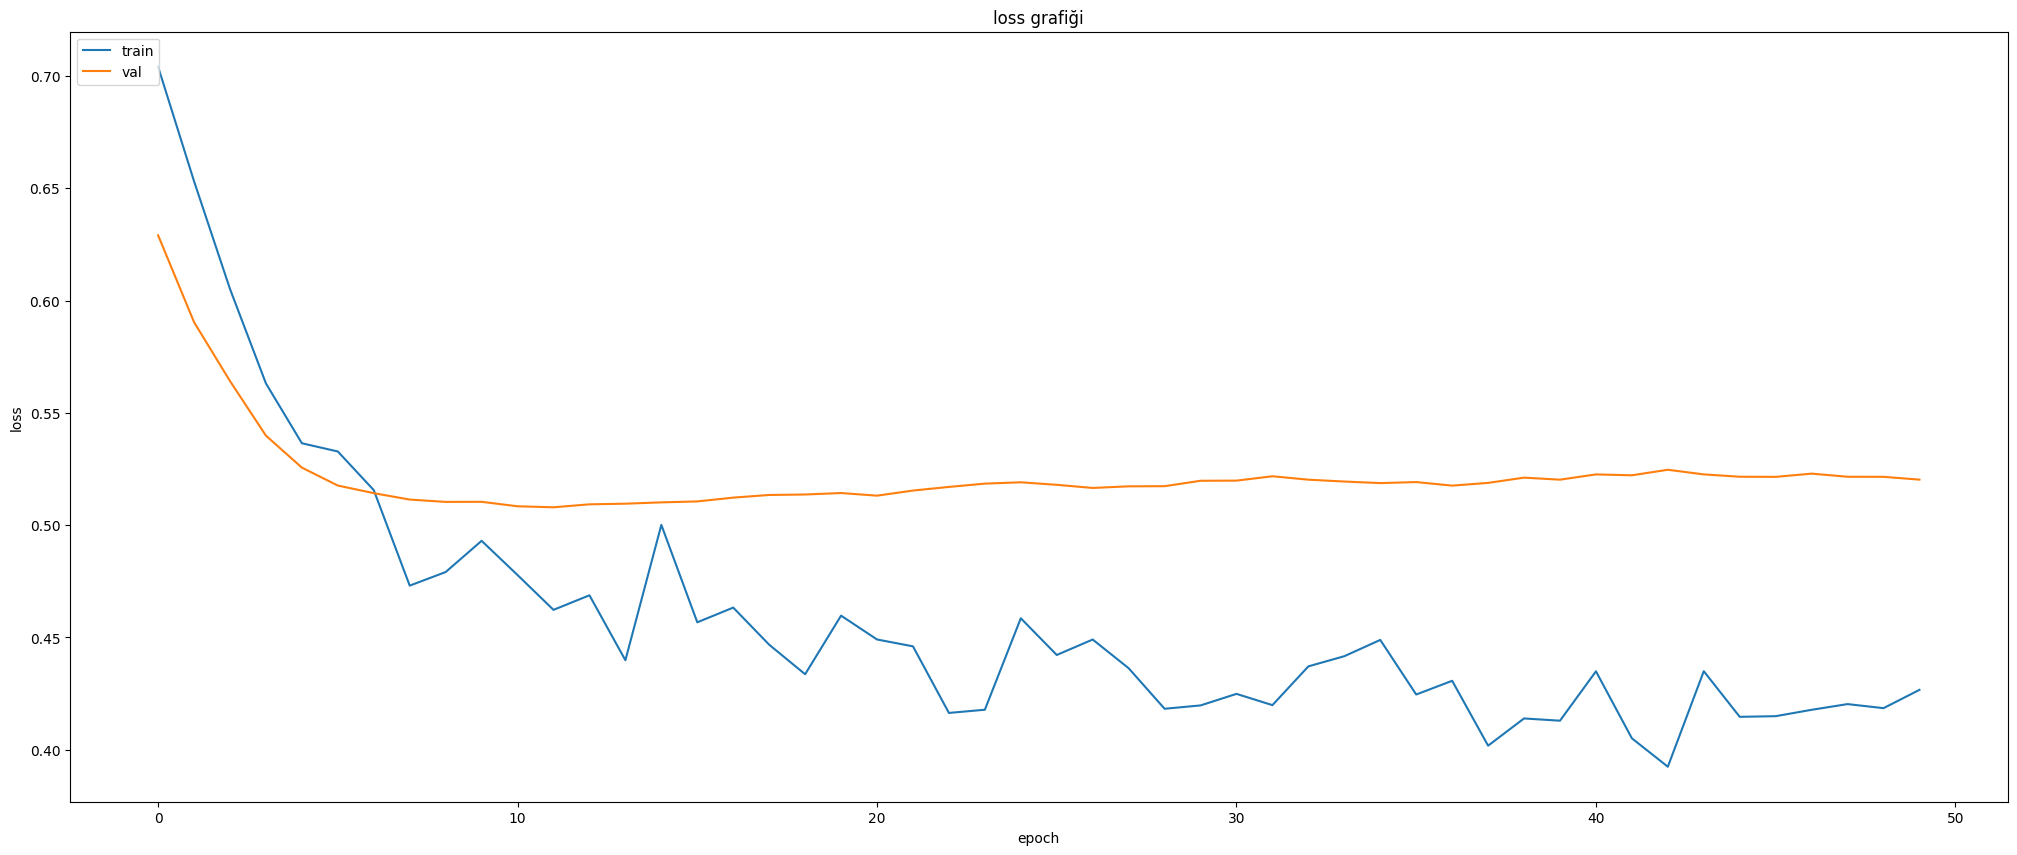

In [6]:
import zipfile
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout,Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Zip dosyasını aç ve veriyi oku
df_zip = zipfile.ZipFile("/content/titanic.zip")
veri = pd.read_csv(df_zip.open("train.csv"))

# Gereksiz sütunları kaldır ve eksik değerleri doldur
veri = veri.drop(["PassengerId", "Cabin","Ticket"], axis=1)
veri["Age"] = veri["Age"].fillna(veri["Age"].mean())
veri["Embarked"] = veri["Embarked"].fillna(veri["Embarked"].mode()[0])

# Yeni 'Title' sütununu oluştur ve temizle
veri["Title"] = veri["Name"].str.split(",").str.get(1).str.split(".").str.get(0).str.strip()
veri = veri.drop("Name", axis=1)

# Title sütununu basitleştirme (isteğe bağlı)
veri["Title"] = veri["Title"].replace(['Ms', 'Mlle'], 'Miss')
veri["Title"] = veri["Title"].replace(['Mme', 'Lady', 'Countess', 'Dona'], 'Mrs')

# Kategorik değişkenleri sayısal forma dönüştür
kat = ["Pclass", "Sex", "Embarked", "Title"]
le = LabelEncoder()
for i in kat:
    veri[i] = le.fit_transform(veri[i])

# Bağımsız ve bağımlı değişkenleri ayır
y = veri["Survived"]
x = veri.drop("Survived", axis=1)

# Veriyi ölçekle
sc = StandardScaler()
x = sc.fit_transform(x)

# Eğitim, test ve doğrulama setlerine ayır
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))  # İlk katmanda Input kullanılıyor
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
cıktı = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,verbose=0)

plt.figure(figsize=(25,10))
plt.plot(cıktı.history["accuracy"])
plt.plot(cıktı.history["val_accuracy"])
plt.title("başarı grafiği")
plt.ylabel("Başarı")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()

plt.figure(figsize=(25,10))
plt.plot(cıktı.history["loss"])
plt.plot(cıktı.history["val_loss"])
plt.title("loss grafiği")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()